# Replication of Angrist (1990): Lifetime earnings and the  Vietnam  era draft lottery: Evidence from social security administrative records 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary.auxiliary_figures import get_figure1, get_figure2, get_figure3
from auxiliary.auxiliary_tables import (
    get_table1,
    get_table2,
    get_table3,
    get_table4,
)
from auxiliary.auxiliary_data import process_data
from auxiliary.auxiliary_visuals import background_negative_green, p_value_star
from auxiliary.auxiliary_extensions import (
    get_flexible_table4,
    get_figure1_extension1,
    get_figure2_extension1,
    get_bias,
    get_figure1_extension2,
    get_figure2_extension2,
)
import warnings

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [12, 6]

The code below is needed to automatically enumerate the equations used in this notebook. 

In [2]:
%%javascript
MathJax.Hub.Config({TeX: {equationNumbers: {autoNumber: "AMS"}}})
MathJax.Hub.Queue(
    ["resetEquationNumbers", MathJax.InputJax.TeX],
    ["PreProcess", MathJax.Hub],
    ["Reprocess", MathJax.Hub],
);

<IPython.core.display.Javascript object>

This notebook replicates the core results of the following paper: 

> Angrist, Joshua. (1990). [Lifetime Earnings and the Vietnam Era Draft Lottery: Evidence from Social Security Administrative Records](https://www.jstor.org/stable/2006669?seq=1#metadata_info_tab_contents). *American Economic Review*. 80. 313-36.

In the following just a few notes on how to read the remainder:

- In this excerpt I replicate the Figures 1 to 3 and the Tables 1 to 4 (in some extended form) while I do not consider Table 5 to be a core result of the paper which is why it cannot be found in this notebook. 
- I follow the example of Angrist keeping his structure throughout the replication part of this notebook.
- The naming and order of appearance of the figures does not follow the original paper but the published [correction](https://economics.mit.edu/files/7769). 
- The replication material including the partially processed data as well as some replication do-files can be found [here](https://economics.mit.edu/faculty/angrist/data1/data/angrist90).

## 1. Introduction

---

For a soft introduction to the topic, let us have a look at the goal of Angrist's article. Already in the first few lines Angrist states a clear-cut aim for his paper by making the remark that "yet, academic research has not shown conclusively that Vietnam (or other) veterans are worse off economically than nonveterans". He further elaborates on why research had yet been so inconclusive. He traces it back to the flaw that previous research had solely tried to estimate the effect of veteran status on subsequent earnings by comparing the latter across individuals differing in veteran status. He argues that this naive estimate might likely be biased as it is easily imaginable that specific types of men choose to enlist in the army whose unobserved characteristics imply low civilian earnings (self-selcetion on unobservables).

Angrist avoids this pitfall by employing an instrumental variable strategy to obtain unbiased estimates of the effect of veteran status on earnings. For that he exploits the random nature of the Vietnam draft lottery. This lottery randomly groups people into those that are eligible to be forced to join the army and those that are not. The idea is that this randomly affects the veteran status without being linked to any unobserved characteristics that cause earnings. This allows Angrist to obtain an estimate of the treatment effect that does not suffer from the same shortcomings as the ones of previous studies. 

He finds that Vietnam era veterans are worse off when it comes to long term annual real earnings as opposed to those that have not served in the army. In a secondary point he traces this back to the loss of working experience for veterans due to their service by estimating a simple structural model. 

In the following sections I first walk you through the identification idea and empirical strategy. Secondly, I replicate and explain the core findings of the paper with a rather extensive elaboration on the different data sources used and some additional visualizations. Thirdly, I critically assess the paper followed by my own  two extensions concluding with some overall remarks right after. 

## 2. Identification and Empirical Approach

---

As already mentioned above the main goal of Angrist's paper is to determine the causal effect of veteran status on subsequent earnings. He believes for several reasons that conventional estimates that only compare earnings by veteran status are biased due to unobservables that affect both the probability of serving in the military as well as earnings over lifetime. This is conveniently shown in the causal graph below. Angrist names two potential reasons why this might be likely. First of all, he makes the point that probably people with few civilian opportunities (lower expected earnings) are more likely to register for the army. Without a measure for civilian opportunities at hand a naive estimate of the effect of military service on earnings would not be capable of capturing the causal effect. Hence, he believes that there is probably some self-selection into treatment on unobservables by individuals. In a second point, Angrist states that the selection criteria of the army might be correlated with unobserved characteristics of individuals that makes them more prone to receiving future earnings pointing into a certain direction. 

Econometrically spoken, Angrist argues with the following linear regression equation representing a version of the right triangle in the causal graph:

\begin{align}
    y_{cti} = \beta_c + \delta_t + s_i \alpha + u_{it}.
\end{align}

He argues that estimating the above model with the real earnings $y_{cti}$ for an individual $i$ in cohort $c$ at time $t$ being determined by cohort and time fixed effects ($\beta_c$ and $\delta_t$) as well an individual effect for veteran status is biased. This is for the above given reasons that the indicator for veteran status $s_i$ is likely to be correlated with the error term $u_{it}$. 

Angrist's approach to avoid bias is now to employ an instrumental variable approach which is based on the accuracy of the causal graph below. 

<div>
<img src="material/fig-angrist-1990-valid.png" width="600"/>
</div>

The validity of this causal graph rests on the crucial reasoning that there is no common cause of the instrument (Draft Lottery) and the unobserved variables (U). Angrist provides the main argument that the draft lottery was essentially random in nature and hence is not correlated with any personal characteristics and therefore not linked to any unobservables that might determine military service and earnings. As will be later explained in more detail, the Vietnam draft lottery determined randomly on the basis of the birth dates whether a person is eligible to be drafted by the army in the year following the lottery. The directed graph from Draft Lottery to Military Service is therefore warranted as the fact of having a lottery number rendering a person draft-eligible increases the probability of joining the military as opposed to a person that has an excluded lottery number. 

This argumentation leads Angrist to use the probability of being a veteran conditional on being draft-eligible in the lottery as an instrument for the effect of veteran status on earnings. In essence this is the Wald estimate which is equal to the following formula:

\begin{align*}
\hat{\alpha}_{IV, WALD} = \frac{E[earnings \mid eligible = 1] - E[earnings \mid eligible = 0]}{E[veteran \mid eligible = 1] - E[veteran \mid eligible = 0]}
\end{align*}

The nominator equals to the estimated $\alpha$ from equation (1) while the denominator can be obtained by a first stage regression which regresses veteran status on draft-eligibility. It reduces to estimating the difference in conditional probabilities of being a veteran $prob(veteran \mid eligible = 1) - prob(veteran \mid eligible = 0)$. Estimates for this are obtained by Angrist through weighted least squares (WLS). This is done as Angrist does not have micro data but just grouped data (for more details see the data section in the replication). In order to obtain the estimates of the underlying micro level data it is necessary to adjust OLS by the size of the respective groups as weights. The above formula is also equivalent to a Two Stage Least Squares (2SLS) procedure in which earnings are regressed on the fitted values from a first stage regression of veteran status on eligibility. 

In a last step, Angrist generalizes the Wald grouping method to more than just one group as instrument. There are 365 lottery numbers that were split up into two groups (eligible and non-eligible) for the previous Wald estimate. Those lottery numbers can also be split up even further into many more subgroups than just two, resulting in many more dummy variables as instruments. Angrist splits the lottery numbers into intervals of five which determine a group $j$. By cohort $c$ he estimates for each group $j$ the conditional probability of being a veteran $p_{cj}$. This first stage is again run by WLS. The resulting estimate $\hat p_{cj}$ is then used to conduct the second stage regression below. 

\begin{align}
\bar y_{ctj} = \beta_c + \delta_t + \hat p_{cj} \alpha + \bar u_{ctj}
\end{align}

The details and estimation technique will be further explained when presenting the results in the replication section below. 

## 3. Replication

---

### 3.1 Background and Data

### The Vietnam Era Draft Lottery

Before discussing how the data looks like it is worthwhile to understand how the Vietnam era draft lottery was working in order to determine to which extent it might actually serve as a valid instrument. During the Vietnam war there were several draft lotteries. They were held in the years from 1970 to 1975. The first one took place at the end of 1969 determining which men might be drafted in the following year. This procedure of determining the lottery numbers for the following year continued until 1975. The table below shows for which years there were lotteries drawn and which birth years were affected by them in the respective year. For more details have a look [here](https://www.sss.gov/history-and-records/vietnam-lotteries/). 

| **Year**     | **Cohorts**   | **Draft-Eligibility Ceiling**|
|--------------|---------------|------------------------------|
| 1970         | 1944-50       | 195                          |
| 1971         | 1951          | 125                          |
| 1972         | 1952          | 95                           |
| 1973         | 1953          | 95                           |
| 1974         | 1954          | 95                           |
| 1975         | 1955          | 95                           |
| 1976         | 1956          | 95                           |

The authority of drafting men for the army through the lottery expired on June 30, 1973 and already before no one was drafted anymore. The last draft call took place on December 7, 1972. 

The general functioning of those seven lotteries was that every possible birthday (365 days) was randomly assigned a number between 1 and 365 without replacement. Taking the 1969 lottery this meant that the birthdate that had the number 1 assigned to, it caused every man born on that day in the years 1944 to 1950 to be drafted first if it came to a draft call in the year 1970. In practice, later in the same year of the draft lottery, the army announced draft-eligibility ceilings determining up to which draft lottery number was called in the following year. In 1970, this means that every man having a lottery number of below 195 was called to join the army. As from 1973 on nobody was called anymore, the numbers for the ceiling are imputed from the last observed one which was 95 in the year 1972. Men with lottery numbers below the ceiling for their respective year are from here on called "draft-eligible". 

Being drafted did not mean that one actually had to serve in the army, though. Those drafted had to pass mental and physical tests which in the end decided who had to join. Further it should be mentioned that Angrist decides to only use data on those that turned 19 when being at risk of induction which includes men born between 1950 and 1953.

### The Data

#### Continuous Work History Sample (CWHS)

This administrative data set constitutes a random one percent sample draw of all possible social security numbers in the US. For the years from 1964 until 1984 it includes the **FICA** (social security) earnings history censored to the Social Security maximum taxable amount. It further includes FICA taxable earnings from self-employment. For the years from 1978 on it also has a series on total earnings (**Total W-2**) including for instance cash payments but excluding earnings from self-employment. This data set has some confidentiality restrictions which means that only group averages and variances were available. This means that Angrist cannot rely on micro data but has to work with sample moment which is a crucial factor for the exact implementation of the IV method. A group is made of by year of earnings, year of birth, ethnicity and five consecutive lottery numbers. The statistics collected for those also include the number of people in the group, the fraction of them having taxable earnings equal and above the taxable maximum and the fraction having zero earnings. 

Regarding the actual data sets available for replication we have the data set `cwhsa` which consists of the above data for the years from 1964 to 1977 and then `cwhsb` which consists of the CWHS for the years after.

Above that Angrist provides the data set `cwhsc_new` which includes the **adjusted FICA** earnings. For those Angrist employed a strategy to approximate the underlying uncensored FICA earnings from the reported censored ones. All of those three different earnings variables are used repeatedly throughout the replication. 

In [3]:
process_data("cwhsa")

earnings  earnings variance  \
ethnicity birth year year lottery interval                                   
1         44         64   1                 1691.030029        1480.599976   
                          2                 1535.430054        1359.020020   
                          3                 1818.010010        1604.420044   
                          4                 1636.380005        1626.270020   
                          5                 1889.800049        1639.609985   
...                                                 ...                ...   
2         53         77   69                3643.739990        4273.600098   
                          70                4127.490234        5623.089844   
                          71                4712.459961        4588.279785   
                          72                4676.939941        5321.140137   
                          73                4651.870117        4989.020020   

                                            sample size  \
ethnicity birth year year lottery interval                
1         44         64   1                       182.0   
                          2                       187.0   
                          3                       210.0   
                          4                       208.0   
                          5                       207.0   
...                                                 ...   
2         53         77   69                       53.0   
                          70                       55.0   
                          71                       76.0   
                          72                       85.0   
                          73                       83.0   

                                            fraction zero earnings  
ethnicity birth year year lottery interval                          
1         44         64   1                                  0.170  
                          2                                  0.187  
                          3                                  0.171  
                          4                                  0.231  
                          5                                  0.184  
...                                                            ...  
2         53         77   69                                 0.415  
                          70                                 0.473  
                          71                                 0.316  
                          72                                 0.353  
                          73                                 0.241  

[20440 rows x 4 columns]

The above earnings data only consists of FICA earnings. The lottery intervals from 1 to 73 are equivalent to intervals of five consecutive lottery numbers. Consequently, the variable lottery interval equals to one for the lottery numbers 1 to 5 and so on. The ethnicity variable is encoded as 1 for a white person and 2 for a nonwhite person.

In [4]:
process_data("cwhsb")

earnings  \
data source ethnicity birth year year lottery interval             
TAXAB       1         44         78   1                 10625.58   
                                      2                 11546.46   
                                      3                 11401.16   
                                      4                 10899.99   
                                      5                 11667.14   
...                                                          ...   
TOTAL       2         53         84   69                 6846.43   
                                      70                11357.89   
                                      71                 8695.86   
                                      72                14013.24   
                                      73                10742.71   

                                                        earnings variance  \
data source ethnicity birth year year lottery interval                      
TAXAB       1         44         78   1                           7052.47   
                                      2                           8032.55   
                                      3                           7508.27   
                                      4                           7342.60   
                                      5                           7507.56   
...                                                                   ...   
TOTAL       2         53         84   69                          9117.49   
                                      70                         14734.47   
                                      71                          9613.24   
                                      72                         14182.30   
                                      73                         18095.78   

                                                        sample size  \
data source ethnicity birth year year lottery interval                
TAXAB       1         44         78   1                         179   
                                      2                         182   
                                      3                         209   
                                      4                         206   
                                      5                         207   
...                                                             ...   
TOTAL       2         53         84   69                         53   
                                      70                         55   
                                      71                         76   
                                      72                         84   
                                      73                         83   

                                                        fraction zero earnings  
data source ethnicity birth year year lottery interval                          
TAXAB       1         44         78   1                                  0.179  
                                      2                                  0.198  
                                      3                                  0.196  
                                      4                                  0.189  
                                      5                                  0.159  
...                                                                        ...  
TOTAL       2         53         84   69                                 0.396  
                                      70                                 0.455  
                                      71                                 0.368  
                                      72                                 0.274  
                                      73                                 0.506  

[20440 rows x 4 columns]

As stated above this data now consists of earnings from 1978 to 1984 for FICA (here encoded as "TAXAB") and Total W-2 (encoded as "TOTAL").

#### Survey of Income and Program Participation (SIPP) and the Defense Manpower Data Center (DMDC)

Throughout the paper it is necessary to have a measure of the fraction of people serving in the military. For this purpose the above two data sources are used. 

The **SIPP** is a longitudinal survey of around 20,000 households in the year 1984 for which is determined whether the persons in the household are Vietnam war veterans. The survey also collected data on ethnicity and birth data which made it possible to match the data to lottery numbers. The **DMDC** on the other hand is an administrative record which shows the total number of new entries into the army by ethnicity, cohort and lottery number per year from mid 1970 until the end of 1973. 
Those sources are needed for the results in Table 3 and 4. A combination of those two are matched to the earnings data of the CWHS which constitutes the data set `chwsc_new` below.

In [5]:
data_cwhsc_new = process_data("cwhsc_new")
data_cwhsc_new

earnings  \
data source ethnicity birth year year lottery interval                 
ADJ         1         50         74   1                  8853.940430   
                                 75   1                  9062.639648   
                                 76   1                 10096.055664   
                                 77   1                 10916.072266   
                                 78   1                 11738.444336   
...                                                              ...   
TOTAL       2         53         84   37                10562.357422   
                                      57                 8988.295898   
                                      40                 9857.195312   
                                      11                 8690.839844   
                                      23                 9709.985352   

                                                        probability of serving  
data source ethnicity birth year year lottery interval                          
ADJ         1         50         74   1                               0.352700  
                                 75   1                               0.352700  
                                 76   1                               0.352700  
                                 77   1                               0.352700  
                                 78   1                               0.352700  
...                                                                        ...  
TOTAL       2         53         84   37                              0.111818  
                                      57                              0.082410  
                                      40                              0.111429  
                                      11                              0.088025  
                                      23                              0.073750  

[12818 rows x 2 columns]

This data set now also includes the adjusted FICA earnings which are marked by "ADJ" as well as the probability of serving in the military conditional on being in a group made up by ethnicity, birth cohort and lottery interval. 

Below we have a short look at how the distribution of the different earnings measures look like. In the table you see the real earnings in 1978 dollar terms for the years from 1974 to 1984 for FICA and adjusted FICA as well as the years 1978 until 1984 for Total W-2. 

Text(0.5, 1.0, 'Kernel Density of the different Earning Measures')

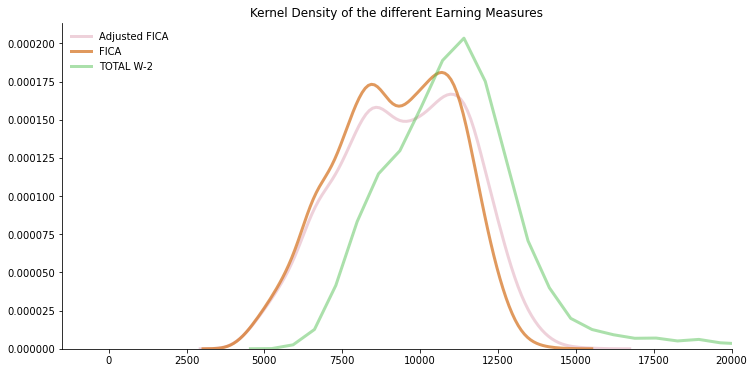

In [6]:
for data in ["ADJ", "TAXAB", "TOTAL"]:
    ax = sns.kdeplot(
        data_cwhsc_new.loc[data, "earnings"],
        color=np.random.choice(np.array([sns.color_palette()]).flatten(), 4),
    )
ax.set_xlim(xmax=20000)
ax.legend(["Adjusted FICA", "FICA", "TOTAL W-2"], loc="upper left")
ax.set_title("Kernel Density of the different Earning Measures")

For a more detailed description of the somewhat confusing original variable names in the data sets please refer to the appendix at the very bottom of the notebook.

### 3.2 Establishing the Validity of the Instrument

In order to convincingly pursue the identification strategy outlined above it is necessary to establish an effect of draft eligibility (the draft lottery) on veteran status and to argue that draft eligibility is exogenous to any unobserved factor affecting both veteran status and subsequent earnings. As argued before one could easily construct reasonable patterns of unobservables that both cause veteran status and earnings rendering a naive regression of earnings on veteran status as biased. 

The first requirement for IV to be valid holds as it is clearly observable that draft-eligibility has an effect on veteran status. The instrument is hence **relevant**. For the second part Angrist argues that the draft lottery itself is random in nature and hence not correlated with any unobserved characteristics (**exogenous**) a man might have that causes him to enroll in the army while at the same time making his earnings likely to go into a certain direction irrespective of veteran status. 

On the basis of this, Angrist now shows that subsequent earnings are affected by draft eligibility. This is the foundation to find a nonzero effect of veteran status on earnings. Going back to the causal diagram from before, Angrist argued so far that there is no directed graph from Draft Lottery to the unobservables U but only to Military Service. Now he further establishes the point that there is an effect of draft-eligibility (Draft Lottery) that propagates through Military Service onto earnings (Wages). 

In order to see this clearly let us have a look at **Figure 1** of the paper below. For white and nonwhite men separately the history of average FICA earnings in 1978 dollar terms is plotted. This is done by year within cohort across those that were draft-eligible and those that were not. The highest two lines represent the 1950 cohort going down to the cohort of men born in 1953. There is a clearly observable pattern among white men in the cohorts from 1950 to 52 which shows persistently lower earnings for those draft-eligible starting the year in which they could be drafted. This cannot be seen for those born in 1953 which is likely due to the fact that nobody was actually drafted in 1973 which would have otherwise been "their" year. For nonwhite men the picture is less clear. It seems that for cohorts 50 to 52 there is slightly higher earnings for those ineligible but this does not seem to be persistent over time. The cohort 1953 again does not present a conclusive image. Observable in all lines, though, is that before the year of conscription risk there is no difference in earnings among the group which is due to the random nature of the draft lottery.

In [7]:
# read in the original data sets
data_cwhsa = pd.read_stata("data/cwhsa.dta")
data_cwhsb = pd.read_stata("data/cwhsb.dta")
data_cwhsc_new = pd.read_stata("data/cwhsc_new.dta")
data_dmdc = pd.read_stata("data/dmdcdat.dta")
data_sipp = pd.read_stata("data/sipp2.dta")

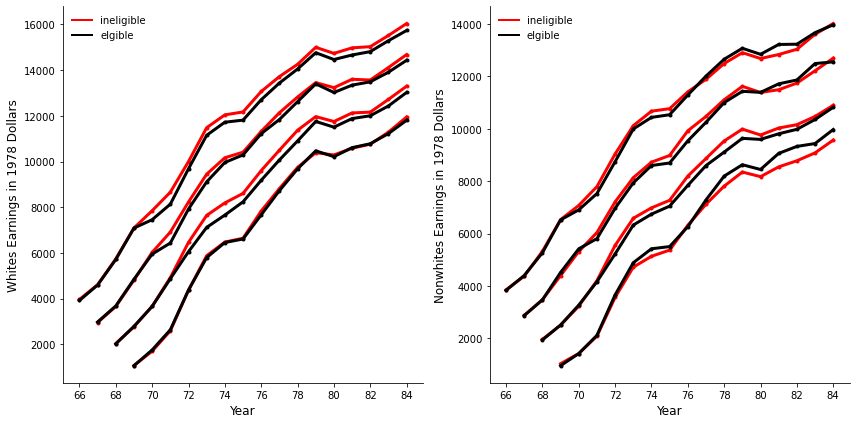

In [8]:
get_figure1(data_cwhsa, data_cwhsb)

A more condensed view of the results in Figure 1 is given in **Figure 2**. It depicts the differences in earnings between the red and the black line in Figure 1 by cohort and ethnicity. This is just included for completeness as it does not provide any further insight in comparison to Figure 1.

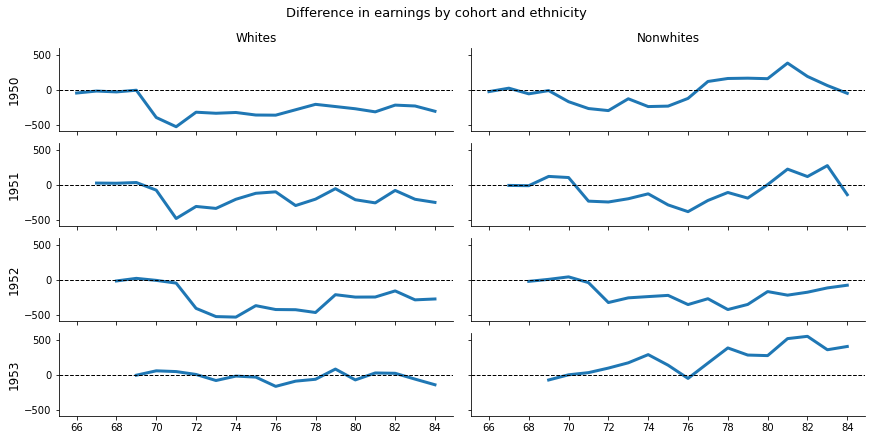

In [9]:
get_figure2(data_cwhsa, data_cwhsb)

A further continuation of this line of argument is resulting in **Table 1**. Angrist makes the observations from the figures before even further fine-grained and explicit. In Table 1 Angrist estimates the expected difference in average FICA and Total W-2 earnings by ethnicity within cohort and year of earnings. In the table below for white men we can observe that there is no significant difference to the five percent level for the years before the year in which they might be drafted. This changes for the cohorts from 1950 to 52 in the years 1970 to 72, respectively. There we can observe a significantly lower income for those eligible in comparison to those ineligible. This seems to be persistent for the cohorts 1950 and 52 while less so for those born in 1951 and 1953. It should further be noted that Angrist reports that the quality of the Total W-2 earnings data was low in the first years (it was launched in 1972) explaining the inconlusive estimations in the periods at the beginning.

To focus the attention on the crucial points I mark all the negative estimates in different shades of green with more negative ones being darker. This clearly emphasizes the verbal arguments brought up before.

In [10]:
table1 = get_table1(data_cwhsa, data_cwhsb)
table1["white"].style.applymap(background_negative_green)

For the nonwhite males there is no clear cut pattern. Only few cells show significant results which is why Angrist in the following focuses on white males when constructing IV estimates. For completeness I present Table 1 for nonwhite males below although it is somewhat less important for the remainder of the paper.

In [11]:
table1["nonwhite"].style.applymap(background_negative_green)

### 3.3 Measuring the Effect of Military Service on Earnings

#### 3.3.1 Wald-estimates 

As discussed in the identification section a simple OLS regression estimating the model in equation (1) might suffer from bias due to elements of $s_i$ that are correlated with the error term $u_{it}$. This problem can be to a certain extent circumvented by the grouping method proposed by Abraham Wald (1940). Grouping the data by the instrument which is draft eligibility status makes it possible to uncover the effect of veteran status on earnings. 
An unbiased estimate of $\alpha$ can therefore be found by adjusting the difference in mean earnings across eligibility status by the difference in probability of becoming a veteran conditional on being either draft eligible or not. This verbal explanation is translated in the following formula:

\begin{equation}
    \hat\alpha = \frac{\bar y^e - \bar y^n}{\hat{p}(V|e) - \hat{p}(V|n)}
\end{equation}

The variable $\bar y$ captures the mean earnings within a certain cohort and year further defined by the superscript $e$ or $n$ which indicates draft-eligibility status. The above formula poses the problem that the conditional probabilities of being a veteran cannot be obtained from the CWHS data set alone. Therefore in **Table 2** Angrist attempts to estimate them from two other sources. First from the SIPP which has the problem that it is a quite small sample. And secondly, he matches the CWHS data to the DMDC. Here it is problematic, though, that the amount of people entering the army in 1970 (which is the year when those born 1950 were drafted) is only collected for the second half of the year. This is the reason why Angrist has to go with the estimates from the SIPP for the cohort of 1950 while taking the bigger sample of the matched DMDC/CWHS for the birth years 1951 to 53. The crucial estimates needed for the denominator of equation (3) are presented in the last column of Table 2 below. It can already be seen that the differences in earnings by eligibility that we found in Table 1 will be scaled up quite a bit to obtain the estimates for $\hat{\alpha}$. We will come back to that in Table 3.

<div class="alert alert-block alert-success">
<b>Note:</b> The cohort 1950 for the DMDC/CWHS could not be replicated as the data for cohort 1950 from the DMDC set is missing in the replication data. Above that the standard errors for the estimates coming form SIPP differ slightly from the published results but are equal to the results from the replication code.
</div>

In [12]:
table2 = get_table2(data_cwhsa, data_dmdc, data_sipp)
table2["white"]

Sample  P(Veteran)  P(Veteran|eligible)  \
Data Set  Cohort Statistic                                                  
SIPP (84) 1950   Value             351.0      0.2673               0.3527   
                 Standard Error               0.0136               0.0215   
          1951   Value             359.0      0.1973               0.2831   
                 Standard Error               0.0124               0.0230   
          1952   Value             336.0      0.1554               0.2310   
                 Standard Error               0.0111               0.0245   
          1953   Value             390.0      0.1298               0.2192   
                 Standard Error               0.0102               0.0313   
DMDC/CWHS 1951   Value           16768.0      0.1176               0.2071   
                 Standard Error               0.0025               0.0053   
          1952   Value           17703.0      0.1515               0.2683   
                 Standard Error               0.0027               0.0065   
          1953   Value           17749.0      0.1343               0.1548   
                 Standard Error               0.0026               0.0053   

                                 P(Veteran|ineligible)  \
Data Set  Cohort Statistic                               
SIPP (84) 1950   Value                          0.1934   
                 Standard Error                 0.0166   
          1951   Value                          0.1469   
                 Standard Error                 0.0139   
          1952   Value                          0.1257   
                 Standard Error                 0.0119   
          1953   Value                          0.1126   
                 Standard Error                 0.0104   
DMDC/CWHS 1951   Value                          0.0708   
                 Standard Error                 0.0024   
          1952   Value                          0.1102   
                 Standard Error                 0.0027   
          1953   Value                          0.1268   
                 Standard Error                 0.0029   

                                 P(V|eligible) - P(V|ineligible)  
Data Set  Cohort Statistic                                        
SIPP (84) 1950   Value                                    0.1594  
                 Standard Error                           0.0272  
          1951   Value                                    0.1362  
                 Standard Error                           0.0269  
          1952   Value                                    0.1053  
                 Standard Error                           0.0273  
          1953   Value                                    0.1066  
                 Standard Error                           0.0330  
DMDC/CWHS 1951   Value                                    0.1362  
                 Standard Error                           0.0059  
          1952   Value                                    0.1581  
                 Standard Error                           0.0071  
          1953   Value                                    0.0280  
                 Standard Error                           0.0060

In [13]:
table2["nonwhite"]

Sample  P(Veteran)  P(Veteran|eligible)  \
Data Set  Cohort Statistic                                                 
SIPP (84) 1950   Value             70.0      0.1625               0.1957   
                 Standard Error              0.0281               0.0449   
          1951   Value             63.0      0.1703               0.2014   
                 Standard Error              0.0283               0.0497   
          1952   Value             52.0      0.1332               0.1449   
                 Standard Error              0.0265               0.0525   
          1953   Value             55.0      0.1749               0.2247   
                 Standard Error              0.0297               0.0762   
DMDC/CWHS 1951   Value           5258.0      0.0794               0.1173   
                 Standard Error              0.0037               0.0076   
          1952   Value           5493.0      0.0953               0.1439   
                 Standard Error              0.0040               0.0095   
          1953   Value           5303.0      0.0925               0.0984   
                 Standard Error              0.0040               0.0079   

                                 P(Veteran|ineligible)  \
Data Set  Cohort Statistic                               
SIPP (84) 1950   Value                          0.1355   
                 Standard Error                 0.0353   
          1951   Value                          0.1514   
                 Standard Error                 0.0340   
          1952   Value                          0.1288   
                 Standard Error                 0.0308   
          1953   Value                          0.1642   
                 Standard Error                 0.0321   
DMDC/CWHS 1951   Value                          0.0599   
                 Standard Error                 0.0040   
          1952   Value                          0.0794   
                 Standard Error                 0.0042   
          1953   Value                          0.0904   
                 Standard Error                 0.0046   

                                 P(V|eligible) - P(V|ineligible)  
Data Set  Cohort Statistic                                        
SIPP (84) 1950   Value                                    0.0603  
                 Standard Error                           0.0571  
          1951   Value                                    0.0500  
                 Standard Error                           0.0603  
          1952   Value                                    0.0161  
                 Standard Error                           0.0609  
          1953   Value                                    0.0605  
                 Standard Error                           0.0827  
DMDC/CWHS 1951   Value                                    0.0574  
                 Standard Error                           0.0086  
          1952   Value                                    0.0644  
                 Standard Error                           0.0104  
          1953   Value                                    0.0080  
                 Standard Error                           0.0092

In the next step Angrist brings together the insights gained so far from his analysis. **Table 3** presents again differences in mean earnings across eligibility status for different earnings measures and within cohort and year. The values in column 1 and 3 are directly taken from Table 1. In column 2 we now encounter the adjusted FICA measure for the first time. As a reminder, it consists of the scaled up FICA earnings as FICA earnings are only reported to a certain maximum amount. The true average earnings are likely to be higher and Angrist transformed the data to account for this. We can see that the difference in mean earnings is most often in between the one of pure FICA earnings and Total W-2 compensation. In column three there is again the probability difference from the last column of Table 2. As mentioned before the measure is taken from the SIPP sample for the cohort of 1950 and the DMDC/CWHS sample for the other cohorts. Angrist decides to exclude cohort 1953 and nonwhite males as for those draft eligibility does not seem to be an efficient instrument (see Table 1 and Figure 1 and 2). Although Angrist does not, in this replication I also present Table 3 for nonwhites to give the reader a broader picture. Further Angrist focuses his derivations only on the years 1981 to 1984 as those are the latest after the Vietnam war for which there was data avalaible. Effects in those years are most likely to represent long term effects. 

Let us now look at the most crucial column of Table 3 which is the last one. It captures the Wald estimate for the effect of veteran status on adjusted FICA earnings in 1978 dollar terms per year and cohort from equation (3). So this is our $\hat{\alpha}$ per year and cohort.
For white males the point estimates indicate that the annual loss in real earnings due to serving in the military was around 2000 dollars. Looking at the high standard errors, though, only few of the estimates are actually statistically significant. In order to see this more clearly I added a star to those values in the last column that are statistically significant to the five percent level.

<div class="alert alert-block alert-success">
<b>Note:</b> In the last column I obtain slightly different standard errors than in the paper. The same is the case, though, in the replication code my replication is building up on.
</div>

In [14]:
table3 = get_table3(data_cwhsa, data_cwhsb, data_dmdc, data_sipp, data_cwhsc_new)
p_value_star(table3["white"], slice(None), ("", "Service Effect in 1978 $"))

First Level                Draft Eligibility Effects in Current $  \
Second Level                                        FICA Earnings   
Cohort Year Statistic                                               
1950   1981 Value                                          -435.8   
            Standard Error                                  210.6   
       1982 Value                                          -320.2   
            Standard Error                                  235.9   
       1983 Value                                          -349.6   
            Standard Error                                  261.7   
       1984 Value                                          -484.4   
            Standard Error                                  286.8   
1951   1981 Value                                          -358.3   
            Standard Error                                  203.7   
       1982 Value                                          -117.3   
            Standard Error                                  229.1   
       1983 Value                                          -314.1   
            Standard Error                                  253.3   
       1984 Value                                          -398.5   
            Standard Error                                  279.3   
1952   1981 Value                                          -342.9   
            Standard Error                                  206.9   
       1982 Value                                          -235.1   
            Standard Error                                  232.4   
       1983 Value                                          -437.7   
            Standard Error                                  257.6   
       1984 Value                                          -436.1   
            Standard Error                                  281.9   

First Level                                                           \
Second Level               Adjusted FICA Earnings Total W-2 Earnings   
Cohort Year Statistic                                                  
1950   1981 Value                          -487.8             -589.7   
            Standard Error                  237.6              299.4   
       1982 Value                          -396.1             -305.5   
            Standard Error                  281.7              345.5   
       1983 Value                          -450.1             -512.9   
            Standard Error                  302.0              441.2   
       1984 Value                          -638.8            -1143.3   
            Standard Error                  336.6              492.3   
1951   1981 Value                          -428.8              -71.6   
            Standard Error                  216.7              423.4   
       1982 Value                          -278.6              -72.8   
            Standard Error                  251.5              372.2   
       1983 Value                          -452.2             -896.6   
            Standard Error                  277.7              426.4   
       1984 Value                          -573.4             -809.2   
            Standard Error                  308.0              381.0   
1952   1981 Value                          -392.7             -440.5   
            Standard Error                  220.3              265.1   
       1982 Value                          -255.3             -514.7   
            Standard Error                  254.0              296.6   
       1983 Value                          -500.1             -915.7   
            Standard Error                  283.3              395.3   
       1984 Value                          -560.1             -767.2   
            Standard Error                  310.8              376.1   

First Level                                                 \
Second Level               P(V|eligible) - P(V|ineligible)   
Cohort Year Statistic                                        
1950 

Looking at nonwhite males now, we observe what we already expected. All of the Wald estimates are actually far away from being statistically significant. 

In [15]:
p_value_star(table3["nonwhite"], slice(None), ("", "Service Effect in 1978 $"))

First Level                Draft Eligibility Effects in Current $  \
Second Level                                        FICA Earnings   
Cohort Year Statistic                                               
1950   1981 Value                                           534.5   
            Standard Error                                  413.6   
       1982 Value                                           285.2   
            Standard Error                                  461.3   
       1983 Value                                            96.1   
            Standard Error                                  512.6   
       1984 Value                                           -76.9   
            Standard Error                                  548.2   
1951   1981 Value                                           313.2   
            Standard Error                                  419.2   
       1982 Value                                           175.5   
            Standard Error                                  471.6   
       1983 Value                                           419.6   
            Standard Error                                  538.2   
       1984 Value                                          -223.2   
            Standard Error                                  562.9   
1952   1981 Value                                          -305.9   
            Standard Error                                  429.1   
       1982 Value                                          -262.6   
            Standard Error                                  476.8   
       1983 Value                                          -177.3   
            Standard Error                                  531.5   
       1984 Value                                          -123.4   
            Standard Error                                  568.6   

First Level                                                           \
Second Level               Adjusted FICA Earnings Total W-2 Earnings   
Cohort Year Statistic                                                  
1950   1981 Value                           654.0              802.6   
            Standard Error                  495.2              524.6   
       1982 Value                           335.4              326.0   
            Standard Error                  529.8              609.0   
       1983 Value                           169.1              315.5   
            Standard Error                  551.6              720.0   
       1984 Value                           -65.1             -287.4   
            Standard Error                  601.9              804.1   
1951   1981 Value                           401.5              416.0   
            Standard Error                  446.6              745.2   
       1982 Value                           228.1             -244.3   
            Standard Error                  524.4              647.8   
       1983 Value                           398.9              254.3   
            Standard Error                  558.8              767.6   
       1984 Value                          -293.5             -718.6   
            Standard Error                  598.1              771.6   
1952   1981 Value                          -316.5             -272.4   
            Standard Error                  454.8              492.9   
       1982 Value                          -502.6             -160.2   
            Standard Error                  524.1              590.0   
       1983 Value                          -275.9              -53.6   
            Standard Error                  546.6              643.5   
       1984 Value                           -99.8             -288.1   
            Standard Error                  600.3              721.0   

First Level                                                 \
Second Level               P(V|eligible) - P(V|ineligible)   
Cohort Year Statistic                                        
1950 

#### 3.3.2 More complex IV estimates

In the next step Angrist uses a more generalized version of the Wald estimate for the given data. While in the previous analysis the mean earnings were compared solely on the basis of two groups (eligibles and ineligibles, which were determined by the lottery numbers), in the following this is extended to more complex subgroups. The grouping is now based on intervals of five consecutive lottery numbers. As explained in the section on idenficication this boils down to estimating the model described in equation (2). 

\begin{equation*}
\bar y_{ctj} = \beta_c + \delta_t + \hat p_{cj} \alpha + \bar u_{ctj}
\end{equation*}

$\bar y_{ctj}$ captures the mean earnings by cohort $c$, in year $t$ for group $j$. $\hat p_{cj}$ depicts the estimated probability of being a veteran conditional on being in cohort $c$ and group $j$. We are now interested in obtaining an estimate of $\alpha$. In our current set up $\alpha$ corresponds to a linear combination of the many different possible Wald estimates when comparing each of the subgroups in pairs. With this view in mind Angrist restricts the treatment effect to be same (i.e. equal to $\alpha$) for each comparison of subgroups. The above equation is equivalent to the second stage of the 2SLS estimation. Angrist estimates the above model using the mean real earnings averaged over the years 1981 to 84 and the cohorts from 1950 to 53. In the first stage Angrist has to estimate $\hat p_{cj}$ which is done again by using a combination of the SIPP sample and the matched DWDC/CWHS data set. With this at hand Angrist shows how the equation (2) looks like if it was estimated by OLS. The following **Figure 3** is also called Visual Instrumental Variables (VIV). In order to arrive there he takes the residuals from an OLS regression of $\bar y_{ctj}$ and $\hat p_{cj}$ on cohort and time dummies, respectively. Then he performs another OLS regression of the earnings residuals on the probability residuals. This is depicted in Figure 3 below. The slope of the regression line corresponds to an IV estimate of $\alpha$. The slope amounts to an estimate of -2384 dollars which serves as a reference for the treatment effect measured by another, more efficient method described below the Figure.  

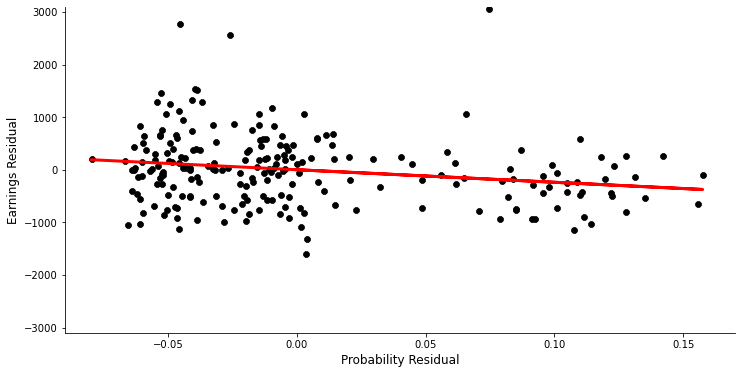

In [16]:
get_figure3(data_cwhsc_new)

We now shortly turn back to a remark from before. Angrist is forced to only work with sample means due to confidentiality restrictions on the underlying micro data. For the Wald estimates it is somewhat easily imaginable that this does not pose any problem. For the above estimation of $\alpha$ using 2SLS this is less obvious. Angrist argues, though, that there is a Generalized Method of Moments (GMM) interpretation of the 2SLS approach which allows him to work with sample moments alone. Another important implication thereof is that he is not restricted to using only one sample to obtain the sample moments. In our concrete case here, it is therefore unproblematic that the earnings data is coming from another sample than the conditional probabilities of being a veteran as both of the samples are drawn from the same population. This is a characteristic of the GMM. 

In the following, Angrist estimates equation (2) by using the more efficient approach of Generalized Least Squares (GLS) as opposed to OLS. The GLS is more efficient if there is correlation between the residuals in a regression model. Angrist argues that this is the case in the above model equation and that this correlation can be estimated. GLS works such that coming from the estimated covariance matrix $\hat\Omega$ of the residuals, the regressors as well as the dependent variable are transformed using the upper triangle of the Cholesky decomposition of $\hat\Omega^{-1}$. Those transformed variables are then used to run a regular OLS model with nonrobust standard errors. The resulting estimate $\hat\alpha$ then is the most efficient one (if it is true that there is correlation between the residuals). 

Angrist states that the optimal weigthing matrix $\Omega$ resulting in the most efficient estimate of $\hat\alpha$ looks the following:

\begin{equation}
    \Omega = V(\bar y_{ctj}) + \alpha^2 V(\hat p_{cj}).
\end{equation}

All of the three elements on the right hand side can be estimated from the data at hand. 

Now we have all the ingredients to have a look at the results in **Table 4**. In practice, Angrist estimates two models in the above manner based on the general form of the above regression equation. Model 1 allows the treatment effect to vary by cohort while Model 2 collapses them into a scalar estimate of $\alpha$. 
The results for white men in Model 1 show that for each of the three earnings measures as dependent variable only few are statistically significant to the five percent level (indicated by a star added by me again). A look at Model 2 reveals, though, that the combined treatment effect is significant and it amounts to a minus of 2000 dollar (we look again at real earnings in 1978 dollar terms) annualy for those having served in the army. For cohort 1953 we obtain insignificant estimates which was to be expected given that actually nobody was drafted in that year.

<div class="alert alert-block alert-success">
<b>Note:</b> The results are again a bit different to those in the paper. The same is the case, though, in the replication code my replication is building up on.
</div>

In [17]:
table4 = get_table4(data_cwhsc_new)
p_value_star(
    table4["white"], (slice(None), slice(None), ["Value", "Standard Error"]), (slice(None)),
)

FICA Taxable Earnings  \
Model   Cohort      Statistic                              
Model 1 1950        Value                        -1709.2   
                    Standard Error                 946.8   
        1951        Value                        -1457.1   
                    Standard Error                 954.7   
        1952        Value                        -1724.0   
                    Standard Error                 863.3   
        1953        Value                         1223.8   
                    Standard Error               3232.5*   
        Chi Squared                                578.3   
Model 2 1950-53     Value                        -1562.9   
                    Standard Error                 521.7   
        Chi Squared                                579.1   

                                   Adjusted FICA Earnings  \
Model   Cohort      Statistic                               
Model 1 1950        Value                         -2093.7   
                    Standard Error                 1109.2   
        1951        Value                         -1983.7   
                    Standard Error                 1036.5   
        1952        Value                        -1943.0*   
                    Standard Error                  927.5   
        1953        Value                           900.7   
                    Standard Error                3506.6*   
        Chi Squared                                 630.3   
Model 2 1950-53     Value                         -1920.4   
                    Standard Error                  576.8   
        Chi Squared                                 631.0   

                                   Total W-2 Compensation  
Model   Cohort      Statistic                              
Model 1 1950        Value                         -1895.0  
                    Standard Error                 1336.9  
        1951        Value                         -2431.4  
                    Standard Error                 1155.4  
        1952        Value                        -2058.7*  
                    Standard Error                 1004.8  
        1953        Value                          -488.6  
                    Standard Error                3947.4*  
        Chi Squared                                 569.5  
Model 2 1950-53     Value                         -2094.5  
                    Standard Error                  649.1  
        Chi Squared                                 569.7

Angrist also reports those estimates for nonwhite men which are not significant. This was already expected as the the instrument was not clearly correlated with the endogenous variable of veteran status. 

In [18]:
p_value_star(
    table4["nonwhite"], (slice(None), slice(None), ["Value", "Standard Error"]), (slice(None)),
)

FICA Taxable Earnings  \
Model   Cohort      Statistic                              
Model 1 1950        Value                        3893.7*   
                    Standard Error                5355.1   
        1951        Value                         -891.3   
                    Standard Error                4399.6   
        1952        Value                        -3182.9   
                    Standard Error                3994.9   
        1953        Value                        -5928.3   
                    Standard Error              10302.3*   
        Chi Squared                                616.7   
Model 2 1950-53     Value                         -643.3   
                    Standard Error                2406.8   
        Chi Squared                                618.4   

                                   Adjusted FICA Earnings  \
Model   Cohort      Statistic                               
Model 1 1950        Value                         3871.9*   
                    Standard Error                 6246.9   
        1951        Value                          -333.4   
                    Standard Error                 4667.1   
        1952        Value                         -3457.7   
                    Standard Error                 4194.9   
        1953        Value                         -8571.5   
                    Standard Error               10652.6*   
        Chi Squared                                 681.7   
Model 2 1950-53     Value                          -999.7   
                    Standard Error                 2602.6   
        Chi Squared                                 683.4   

                                   Total W-2 Compensation  
Model   Cohort      Statistic                              
Model 1 1950        Value                         5711.8*  
                    Standard Error                 7206.5  
        1951        Value                          2609.0  
                    Standard Error                 4887.1  
        1952        Value                         -3068.0  
                    Standard Error                 4222.7  
        1953        Value                         -6325.8  
                    Standard Error               11393.0*  
        Chi Squared                                 693.6  
Model 2 1950-53     Value                           367.8  
                    Standard Error                 2733.8  
        Chi Squared                                 695.6

This table concludes the replication of the core results of the paper. Summing up, Angrist constructed a causal graph for which he employs a plausible estimation strategy. Using his approach he concludes with the main result of having found a negative effect of serving in the military during the Vietnam era on subsequent earnings for white male in the United States. 

Angrist provides some interpretation of the found effect and some concerns that might arise when reading his paper. I will discuss some of his points in the following critical assessment.

## 4. Critical Assessment

---

Considering the time back then and the consequently different state of research, the paper was a major contribution to instrumental variable estimation of treatment effects. More broadly, the paper is very conclusive and well written. Angrist discusses caveats quite thoroughly which makes the whole argumentation at first glance very concise. Methodologically, the paper is quite complex as due to the kind of data available. Angrist is quite innovative in that regard as he comes up with the two sample IV method in this paper which allows him to pratically follow his identification strategy. The attempt to explain the mechanisms behind the negative treatment effect found by him makes the paper comprehensive and shows the great sense of detail Angrist put into this paper. 

While keeping in mind the positive sides of his paper, in hindsight, Angrist is a bit too vocal about the relevance and accuracy of his findings. Given our knowledge about the local average treatment effect (**LATE**) we encountered in our lecture, Angrist only identifies the average treatment effect of the compliers (those that enroll for the army if they are draft-eligible but do not if they are not) if there is individual level treatment heterogeneity and if the causal graph from before is accurate. Hence, the interpretation of the results gives only limited policy implications. For the discussion of veteran compensation the group of those who were induced by the lottery to join the military are not crucial. As there is no draft lottery anymore, what we are interested in is how to compensate veterans for their service who "voluntarily" decided to serve in the military. This question cannot be answered by Angrist's approach given the realistic assumption that there is treatment effect heterogeneity (which also Angrist argues might be warranted).  

A related difficulty of interpretation arises because in the second part, Angrist uses an overidentified model. As already discussed before this amounts to a linear combination of the average treatment effects of subgroups. This mixes the LATEs of several subgroups making the policy implications even more blurred as it is not clear what the individual contributions of the different subgroups are. In this example here this might not make a big difference but should be kept in mind when using entirely different instrumental variables to identify the LATE. 

In a last step, there are several possible scenarios to argue why **the given causal graph might be violated**. Angrist himself delivers one of them. After the lottery numbers were drawn, there was some time in between the drawing and the announcement of the draft-eligibility ceiling. This provoked behavioral responses of some individuals with low numbers to volunteer for the army in order to get better terms of service as well as enrolling in university which rendered them ineligible for the army. In our data, it is unobservable to see the fraction of individuals in each group to join university. If there was actually some avoidance behavior for those with low lottery numbers, then the instrument would be questionable as there would be a path from the Draft Lottery to unobservables (University) which affects earnings. At the same time there is also clearly a relation between University and Military Service. 

Rosenzweig and Wolpin (2000) provide a causal graph that draws the general interpretability of the results in Angrist (1990) further into question. Let us look at the causal graph below now imagining that there was no directed graph from Draft Lottery to Civilian Experience. Their argument is that Military Service reduces Schooling and Civilian Experience which lowers Wages while affecting Wages directly and increasing them indirectly by reducing Schooling and increasing work experience. Those subtle mechanism are all collapsed into one measure by Angrist which gives an only insufficiently shallow answer to potentially more complex policy questions. Building up on this causal graph, Heckman (1997) challenges the validity of the instrument in general by making the point that there might be a directed graph from Draft Lottery to Civilian Experience. The argument goes as follows: Employers, after learning about their employees' lottery numbers, decrease the training on the job for those with a high risk of being drafted. If this is actually warranted the instrument Draft Lottery cannot produce unbiased estimates anymore.  

<img src="material/fig-10-2.png" width="600" />

Morgan and Winship (2014) add to this that the bias introduced by this is further affected by how strongly Draft Lottery affects Military Service. Given the factor that the lottery alone does not determine military service but that there are tests, might cause the instrument to be rather weak and therefore a potential bias to be rather strong. 

## 5. Extensions

---

### 5.1 Treatment effect with different years of earning

In the calculation of the average treatment in Table 4 Angrist chooses to calculate it for earnings in the years from 1981 to 84. While he plausibly argues that this most likely constitutes a long term effect (as those are the last years for which he has data) in comparison to earlier years, it does not give a complete picture. Looking at Table 1 again we can see that for the earnings differences in the years 81 to 84 quite big estimates are calculated. Assuming that the difference in probability of serving given eligibility versus noneligibility stays somewhat stable across the years, we would expect some heterogeneity in average treatment effects depending on which years we use the earnings data of. Angrist, though, does not investigate this although he has the data for it at hand. For example from a policy perspective one could easily argue that a look at the average treatment effect for earlier years (close to the years in which treatment happens) might be more relevant than the one for years after. This is because given the long time between the actual service and the earnings data of 1981 to 84 it is likely that second round effects are driving some of the results. These might be initially caused by veteran status but for later years the effect of veteran status might mainly act by means of other variables. For instance veterans after the war might be forced to take simple jobs due to their lack of work experience and from then on their path is determined by the lower quality of the job that they had to take right after war. For policy makers it might be of interest to see what happens to veterans right after service to see what needs to be done in order to stop second round effects from happening in the first place. 

To give a more wholesome image, I estimate the results for Table 4 for different years of earnings of white men. As mentioned before the quality of the Total W-2 data set is rather low and the adjusted FICA is more plausible than the FICA data. This is why I only use the adjusted FICA data in the following. For the adjusted FICA I have data for Table 4 for the years from 1974 to 1984. For each possible four year range within those ten years I estimate Model 1 and 2 from Table 4 again. 

Below I plot the average treatment effects obtained. On the x-axis I present the starting year of the range of the adjusted FICA data used. For starting value 74 it means that the average treatment effect is calculated for earnings data of the years 1974 to 77. The results at the starting year 81 are equivalent to the ones found by Angrist in Table 4 for white men.  

In [19]:
# get the average treatment effects of Model 1 and 2 with adjusted FICA earnings for several different ranges of four years
results_model1 = np.empty((8, 4))
results_model2 = np.array([])
for number, start_year in enumerate(np.arange(74, 82)):
    years = np.arange(start_year, start_year + 4)
    flex_table4 = get_flexible_table4(data_cwhsc_new, years, ["ADJ"], [50, 51, 52, 53])
    results_model1[number, :] = (
        flex_table4["white"].loc[("Model 1", slice(None), "Value"), :].values.flatten()
    )
    results_model2 = np.append(
        results_model2, flex_table4["white"].loc[("Model 2", slice(None), "Value"), :].values,
    )

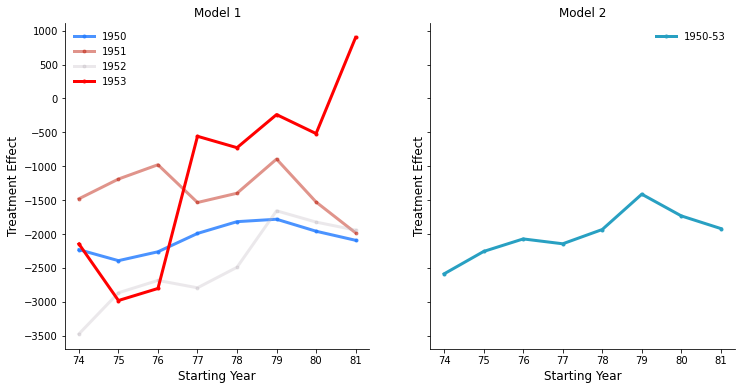

In [20]:
# Plot the effects for white men in Model 1 and 2 (colors apart from Cohort 1950 are random, execute again to change them)
get_figure1_extension1(results_model1, results_model2)

The pattern is more complex than what we can see in the glimpse of Table 4 in the paper. We can see that there is quite some heterogeneity in average treatment effects across cohorts when looking at the data for early years. This changes when using data of later years. Further the fact of being a veteran does seem to play a role for the cohort 1953 right after the war but the treatment effect becomes insignificant when looking at later years. This is interesting as the cohort of 1953 was the one for which no one was drafted (remember that in 1973 no one was drafted as the last call was in December 1972). 

Another observation is linked to the fact that draft eligibility does not matter for those born in 1953. These people appear to have voluntarily joined the army as no one of them could have possibly been drafted. This cannot be said for the cohorts before. Employers can only observe whether a person is a veteran and when they are born (and not if they are compliers or not). A theory could be that employers act on the loss of experience for initial wage setting for every army veteran right after the war. The fact that the cohort of 1953 could only be volunteers but not draftees could give them a boost in social status to catch up again in the long run, though. This mechanism might explain to a certain extent why we observe the upward sloping line for the cohort of 1953 (but not for the other groups).

As discussed in the critical assessment, we actually only capture the local average treatment effect of the compliers. Those are the ones who join the army when they are draft-eligible but do not when they are not. The identifying assumption for the LATE requires that everyone is a complier. This is probably not warranted for the cohort of 1953. In that year it is easily imaginable that there are both defiers and compliers which means that we do not capture the LATE for cohort 1953 in Model 1 and for cohort 1950-53 in Model 2 but something else we do not really know how to interpret. This might be another reason why we observe this peculiar pattern for the cohort of 1953. Following up on this remark I estimate the Model 2 again excluding the cohort of 1953 to focus on the cohorts for which the assumptions for LATE are likely to hold. 

In [21]:
results_model2_53 = np.array([])
for number, start_year in enumerate(np.arange(74, 82)):
    years = np.arange(start_year, start_year + 4)
    flex_table4 = get_flexible_table4(data_cwhsc_new, years, ["ADJ"], [50, 51, 52])
    results_model2_53 = np.append(
        results_model2_53, flex_table4["white"].loc[("Model 2", slice(None), "Value"), :].values,
    )

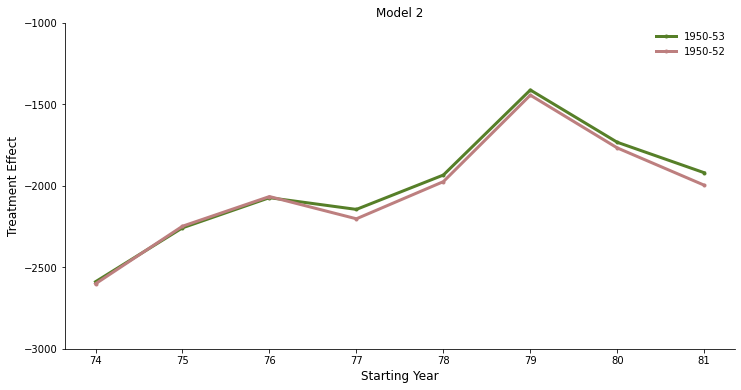

In [22]:
get_figure2_extension1(results_model2, results_model2_53)

We can see that for later years the treatment effect is a bit lower when excluding the cohort of 1953. It confirms the findings of Angrist with the advantage of making it possible to attach a clearer interpretation to it.

Following the above path, it would also be interesting to vary the amount of instruments used by more than just the two ways Angrist has shown. It would be interesting to break down the interval size of lottery numbers further. Unfortunately I could no find a way to do that with the already pre-processed data I have at hand.

### 5.2 Bias Quantification

In the critical assessment I argued that the simple Wald estimate might be biased because employers know their employees' birth date and hence their draft eligibility. The argument was that employers invest less into the human capital of those that might be drafted. This would cause the instrument of draft eligibility to not be valid and hence suffer from bias. This bias can be calculated in the following way for a binary instrument:

\begin{align}
    \frac{E[Y|Z=1] - E[Y|Z=0]}{E[D|Z=1] - E[D|Z=0]} = \delta + \frac{E[\epsilon|Z=1] - E[\epsilon|Z=0]}{E[D|Z=1] - E[D|Z=0]}
\end{align}

What has been done in the last column of Table 3 (the Wald estimate) is that Angrist calculated the left hand side of this equation. This calculation yields an unbiased estimate of the treatment effect of $D$ (veteran status) on $Y$ (earnings) $\delta$ if there is no effect of the instrument $Z$ (draft eligibility) on $Y$ through means of unobservables $\epsilon$. In our argumentation this assumption does not hold which means that $E[\epsilon|Z=1] - E[\epsilon|Z=0]$ is not equal to zero as draft eligibility affects $Y$ by the behavioral change of employers to make investing into human capital dependent on draft eligibility. Therefore the left hand side calculation is not equal to the true treatment effect $\delta$ but has to be adjusted by the bias $\frac{E[\epsilon|Z=1] - E[\epsilon|Z=0]}{E[D|Z=1] - E[D|Z=0]}$.

In this section I run a thought experiment in which I quantify this bias. The argumentation here is rather heuristic because I lack the resources to really find a robust estimate of the bias but it gives a rough idea of whether the bias might matter economically. My idea is the following. In order to get a measure of $E[\epsilon|Z=1] - E[\epsilon|Z=0]$ I have a look at estimates for the effect of work experience on earnings. Remember that the expected difference in earnings due to a difference in draft eligibility is caused by a loss in human capital for those draft eligible because they might miss out on on-the-job-training. This loss in on-the-job-training could be approximated by a general loss in working experience. For an estimate of that effect I rely on Keane and Wolpin (1997) who work with a sample for young men between 14 and 21 years old from the year 1979. The effect of working experience on real earnings could be at least not far off of the possible effect in our sample of adjusted FICA real earnings of 19 year old men for the years 1981 to 1984. Remember that lottery participants find out about whether they are draft eligible or not at the end of the year before they might be drafted. I assume that draft dates are spread evenly over the draft year. One could then argue that on average a draft eligible person stays in his job for another half a year after having found out about the eligibility and before being drafted. Hence, for on average half a year an employer might invest less into the human capital of this draft eligible man. I assume now that employers show a quite moderate behavioral response. During the six months of time, the employees only receive a five month equivalent of human capital gain (or work experience gain) as opposed to the six months they stay in the company. This means they loose one month of work experience on average in comparison to those that are not draft eligible. 

To quantify this one month loss of work experience I take estimates from Keane and Wolpin (1997). For blue collar workers they roughly estimate the gain in real earnings in percent from an increase in a year of blue collar work experience to be 4.6 percent (actually their found effect depends on the years of work experience but I simplify this for my rough calculations). For white collar workers the equivalent estimate amounts to roughly 2.7 percent. I now take those as upper and lower bounds, calculate their one month counterparts and quantify the bias in the Wald estimates of the last column of Table 3. The bias $\frac{E[\epsilon|Z=1] - E[\epsilon|Z=0]}{E[D|Z=1] - E[D|Z=0]}$ is then roughly equal to the loss in annual real earnings due to one month less of work experience divided by the difference in probability of being a veteran conditional on draft eligibility. 

The first table below depicts how the bias changes by cohort across the different years of real earnings with increasing estimates of how a loss in experience affects real earnings. Clearly with increasing estimates of how strong work experience contributes to real earnings, the bias gets stronger. This is logical as it is equivalent to an absolute increase in the nominator. Above that the bias is stronger for later years of earnings as the real earnings increase by year. Further the slope is steeper for later cohorts as the denominator is smaller for later cohorts. Given the still moderate assumption of a loss of one month of work experience we can see that the bias does not seem to be negligible economically especially when taking the blue collar percentage estimate. 

In [23]:
# Calculate the bias, the true delta and the orginal Wald estimate for a ceratain interval of working experience effect
interval = np.linspace(0.025, 0.05, 50) / 12
bias, true_delta, wald = get_bias(
    data_cwhsa, data_cwhsb, data_dmdc, data_sipp, data_cwhsc_new, interval
)

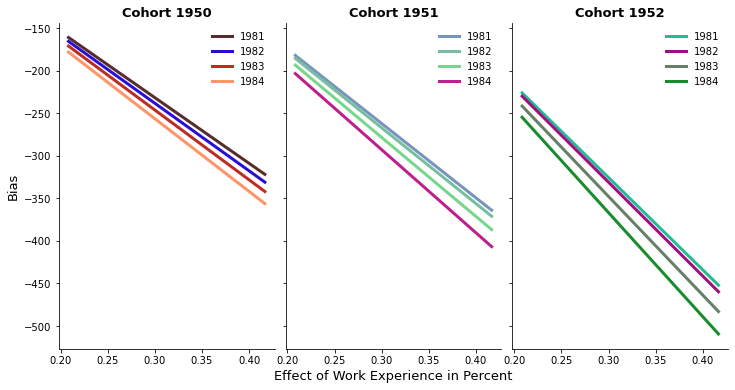

In [24]:
# plot the bias by cohort
get_figure1_extension2(bias, interval)

To get a sense of how the size of the bias relates to the size of the previously estimated Wald coefficients, let us have look at the figure below. It shows for each cell consisting of a cohort and year combination, the Wald estimate from Table 3 as the horizontal line and the true $\delta$ depending on the weight of the loss in work experience as the upward sloping line. Given that our initial estimates of the Wald coefficients are in a range of only a few thousands, an estimated bias of roughly between 200 and 500 dollars cannot be characterized as incosiderable. Further given Angrist's policy question concerning Veteran compensation, even an estimate that is higher by 200 dollars makes a big difference when it is about compensating thousands of veterans. 

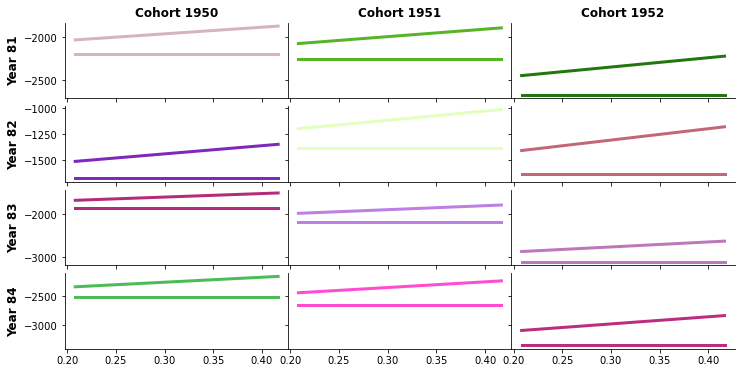

In [25]:
# plot the the true delta (accounted for the bias) compared to the original Wald estimate
get_figure2_extension2(true_delta, wald, interval)

## 6. Conclusion

---

Regarding the overall quality and structure of Angrist (1990), reading it is a real treat. The controversy after its publication and the fact that it is highly cited clearly show how important its contribution was and still is. It is a great piece of discussion when it comes to the interpretability and policy relevance of instrumental variable approaches. As already reiterated in the critical assessment, one has to acknowledge the care Angrist put into this work. Although his results do not seem to prove reliable, it opened a whole discussion on how to use instrumental variables to get the most out of them. Another contribution that should not go unnoticed is that Angrist shows that instruments can be used even though they might not come from the same sample as the dependent and the endogenous variable. Practically, this is very useful as it widens possible areas of application for instrumental variables. 

Overall, it has to be stated that the paper has some shortcomings but the care put into this paper and the good readibility allowed other researchers (and Angrist himself) to swoop in giving helpful remarks that improved the understanding of instrumental variable approaches for treatment effect evaluation.

## References

**Angrist, J.** (1990). [Lifetime Earnings and the Vietnam Era Draft Lottery: Evidence from Social Security Administrative Records](https://www.jstor.org/stable/2006669?seq=1#metadata_info_tab_contents). *American Economic Review*. 80. 313-36.

**Angrist, J. D., & Pischke, J.-S.** (2009). Mostly harmless econometrics: An empiricist's companion.

**Heckman, J.** (1997). Instrumental Variables: A Study of Implicit Behavioral Assumptions Used in Making Program Evaluations. *The Journal of Human Resources*, 32(3), 441-462. doi:10.2307/146178

**Keane, M., & Wolpin, K.** (1997). The Career Decisions of Young Men. *Journal of Political Economy*, 105(3), 473-522. doi:10.1086/262080

**Morgan, S., and Winship, C.** (2014). Counterfactuals and Causal Inference: Methods and Principles for Social Research (Analytical Methods for Social Research). Cambridge: Cambridge University Press. doi:10.1017/CBO9781107587991

**Rosenzweig, M. R. and Wolpin, K. I.**. (2000). “Natural ‘Natural Experiments’ in Economics.” *Journal of Economic Literature* 38:827–74.

**Wald, A.** (1940). The Fitting of Straight Lines if Both Variables are Subject to Error. *Ann. Math. Statist.* 11 , no. 3, 284--300. 

## Appendix

### Key Variables in the Data Sets

#### data_cwhsa

| **Name**        | **Description**                            |
|-----------------|--------------------------------------------|
| **index**       |                                            |
| byr             | birth year                                 |
| race            | ethnicity, 1 for white and 2 for nonwhite  |
| interval        | interval of draft lottery numbers, 73 intervals with the size of five consecutive numbers        |
| year            | year for which earnings are collected      |
| **variables**   |                                            |
| vmn1            | nominal earnings                           |
| vfin1           | fraction of people with zero earnings      |
| vnu1            | sample size                                |
| vsd1            | standard deviation of earnings             |

#### data_cwhsb

| **Name**        | **Description**                            |
|-----------------|--------------------------------------------|
| **index**       |                                            |
| byr             | birth year                                 |
| race            | ethnicity, 1 for white and 2 for nonwhite  |
| interval        | interval of draft lottery numbers, 73 intervals with the size of five consecutive numbers        |
| year            | year for which earnings are collected      |
| type            | source of the earnings data, "TAXAB" for FICA and "TOTAL" for Total W-2      |
| **variables**   |                                            |
| vmn1            | nominal earnings                           |
| vfin1           | fraction of people with zero earnings      |
| vnu1            | sample size                                |
| vsd1            | standard deviation of earnings             |

#### data_cwhsc_new

| **Name**        | **Description**                            |
|-----------------|--------------------------------------------|
| **index**       |                                            |
| byr             | birth year                                 |
| race            | ethnicity, 1 for white and 2 for nonwhite  |
| interval        | interval of draft lottery numbers, 73 intervals with the size of five consecutive numbers        |
| year            | year for which earnings are collected      |
| type            | source of the earnings data, "ADJ" for adjusted FICA, "TAXAB" for FICA and "TOTAL" for Total W-2      |
| **variables**   |                                            |
| earnings            | real earnings in 1978 dollars                           |
| nj           | sample size      |
| nj0           | number of persons in the sample with zero earnings                                |
| iweight_old            | weight for weighted least squares             |
| ps_r            | fraction of people having served in the army             |
| ern74 to ern84           | unweighted covariance matrix of the real earnings             |

#### data_dmdc

| **Name**        | **Description**                            |
|-----------------|--------------------------------------------|
| **index**       |                                            |
| byr             | birth year                                 |
| race            | ethnicity, 1 for white and 2 for nonwhite  |
| interval        | interval of draft lottery numbers, 73 intervals with the size of five consecutive numbers        |
| **variables**   |                                            |
| nsrvd            | number of people having served                           |
| ps_r           | fraction of people having served      |

#### data_sipp (this is the only micro data set)

| **Name**        | **Description**                            |
|-----------------|--------------------------------------------|
| **index**       |                                            |
| u_brthyr             | birth year                                 |
| nrace            | ethnicity, 0 for white and 1 for nonwhite  |
| **variables**   |                                            |
| nvstat            | 0 if man is not a veteran, 1 if he is                            |
| fnlwgt_5           | fraction of people with this index among overall sample      |
| rsncode           | 1 if person was draft eligible, else if not      |